In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Computational Mechanics Project #01 - Heat Transfer in Forensic Science

We can use our current skillset for a macabre application. We can predict the time of death based upon the current temperature and change in temperature of a corpse. 

Forensic scientists use Newton's law of cooling to determine the time elapsed since the loss of life, 

$\frac{dT}{dt} = -K(T-T_a)$,

where $T$ is the current temperature, $T_a$ is the ambient temperature, $t$ is the elapsed time in hours, and $K$ is an empirical constant. 

Suppose the temperature of the corpse is 85$^o$F at 11:00 am. Then, 2 hours later the temperature is 74$^{o}$F. 

Assume ambient temperature is a constant 65$^{o}$F.

1. Use Python to calculate $K$ using a finite difference approximation, $\frac{dT}{dt} \approx \frac{T(t+\Delta t)-T(t)}{\Delta t}$.

In [2]:
time1 = 11
temp1 = 85
time2 = 13
temp2 = 74
Ta = 65

k = -1 * (temp2 - temp1)/((temp1-Ta) * (time2-time1))

print('(1.) Using a finite difference approximation, I found k =', k)

(1.) Using a finite difference approximation, I found k = 0.275


2. Change your work from problem 1 to create a function that accepts the temperature at two times, ambient temperature, and the time elapsed to return $K$.

In [3]:
def k_heattransfer(temp1, temp2, ambtemp, dtime):
    '''This function outputs the empirical constant K, using the inputs temp 1 and 2, the ambient temp, and the time elapsed
    '''
    k = -1 * (temp2 - temp1)/((temp1-ambtemp) * (dtime))
    return k

In [4]:
print('(2.) This process was incorporated into a function which yields k')
k_heattransfer(85,74,65,2)

(2.) This process was incorporated into a function which yields k


0.275

3. A first-order thermal system has the following analytical solution, 

    $T(t) =T_a+(T(0)-T_a)e^{-Kt}$

    where $T(0)$ is the temperature of the corpse at t=0 hours i.e. at the time of discovery and $T_a$ is a constant ambient temperature. 

    a. Show that an Euler integration converges to the analytical solution as the time step is decreased. Use the constant $K$ derived above and the initial temperature, T(0) = 85$^o$F. 

    b. What is the final temperature as t$\rightarrow\infty$?
    
    c. At what time was the corpse 98.6$^{o}$F? i.e. what was the time of death?

(3.a)


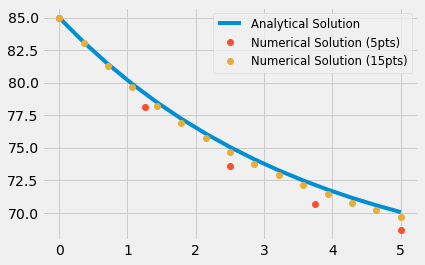

In [5]:
import math as m

def BodyTemp_Analytical(Tamb, Temp_init, k, t):
    BodyTemp_ana = np.zeros(len(t))
    BodyTemp_ana[0] = Temp_init
    for i in range(len(t)):
        BodyTemp_ana[i] = Tamb + (BodyTemp_ana[0] - Tamb) * m.exp(-1 * k * t[i])
    return BodyTemp_ana

def BodyTemp_Numerical(Tamb, Temp_init, k, t):
    dt = t[1] - t[0]
    BodyTemp_num = np.zeros(len(t))
    BodyTemp_num[0] = Temp_init
    for i in range(len(t)-1):
        BodyTemp_num[i+1] = BodyTemp_num[i] - k * (BodyTemp_num[i] - Tamb) * dt
    return BodyTemp_num

t = np.linspace(0,5,5)
t1 = np.linspace(0,5,15)
print('(3.a)')
plt.plot(t1,BodyTemp_Analytical(65, 85, 0.275, t1), label = 'Analytical Solution')
plt.plot(t,BodyTemp_Numerical(65, 85, 0.275, t), 'o', label = 'Numerical Solution (5pts)')
plt.plot(t1,BodyTemp_Numerical(65, 85, 0.275, t1), 'o', label = 'Numerical Solution (15pts)')
plt.legend(fontsize = 'small');

In [6]:
t_inf = np.array([0,1,2,3,4,5,10,20,30,40,50,100,200,1000,10000])

for t in range(len(t_inf)):
    print('at t = {} hours, the body temp is {:0.4f} F'.format(t_inf[t], BodyTemp_Analytical(65, 85, 0.275, t_inf)[t]))

at t = 0 hours, the body temp is 85.0000 F
at t = 1 hours, the body temp is 80.1914 F
at t = 2 hours, the body temp is 76.5390 F
at t = 3 hours, the body temp is 73.7647 F
at t = 4 hours, the body temp is 71.6574 F
at t = 5 hours, the body temp is 70.0568 F
at t = 10 hours, the body temp is 66.2786 F
at t = 20 hours, the body temp is 65.0817 F
at t = 30 hours, the body temp is 65.0052 F
at t = 40 hours, the body temp is 65.0003 F
at t = 50 hours, the body temp is 65.0000 F
at t = 100 hours, the body temp is 65.0000 F
at t = 200 hours, the body temp is 65.0000 F
at t = 1000 hours, the body temp is 65.0000 F
at t = 10000 hours, the body temp is 65.0000 F


(3.b) As you can see in the cell above, as the time elapsed approaches infinity, the temperature of the body approaches 65F, which is the ambient temperature. As the body cools, it comes into equilibrium with its surroundings, with the environment acting as a temperature sink.

In [7]:
def Analytical_TOD(Tamb, Temp_found, Time_found, k):
    TOD = (1 / k) * m.log((98.6-Tamb)/(Temp_found-Tamb))
    TOD_min = TOD * 60
    return TOD_min
    
print('(3.b) The analytical solution with constant ambient temperature predicts'
      ' the time of death was approximately {:0.2f} minutes ago'.format(Analytical_TOD(65, 85, 11, 0.275)))

(3.b) The analytical solution with constant ambient temperature predicts the time of death was approximately 113.19 minutes ago


4. Now that we have a working numerical model, we can look at the results if the
ambient temperature is not constant i.e. T_a=f(t). We can use the weather to improve our estimate for time of death. Consider the following Temperature for the day in question. 

    |time| Temp ($^o$F)|
    |---|---|
    |6am|50|
    |7am|51|
    |8am|55|
    |9am|60|
    |10am|65|
    |11am|70|
    |noon|75|
    |1pm|80|

    a. Create a function that returns the current temperature based upon the time (0 hours=11am, 65$^{o}$F) 
    *Plot the function $T_a$ vs time. Does it look correct? Is there a better way to get $T_a(t)$?

    b. Modify the Euler approximation solution to account for changes in temperature at each hour. 
    Compare the new nonlinear Euler approximation to the linear analytical model. 
    At what time was the corpse 98.6$^{o}$F? i.e. what was the time of death?

(4.a)


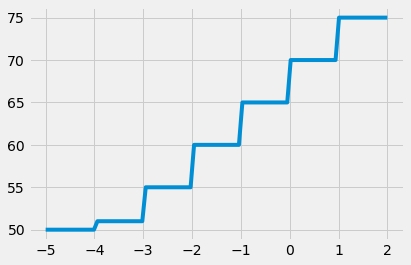

In [8]:
time_vals = np.array([-5,-4,-3,-2,-1,0,1,2])
Temp_vals = np.array([50,51,55,60,65,70,75,80])

def ambient_temp(t):
    if t>=-5 and t<=-4:
        return Temp_vals[0]
    elif t>-4 and t<=-3:
        return Temp_vals[1]
    elif t>-3 and t<=-2:
        return Temp_vals[2]
    elif t>-2 and t<=-1:
        return Temp_vals[3]
    elif t>-1 and t<=0:
        return Temp_vals[4]
    elif t>0 and t<=1:
        return Temp_vals[5]
    elif t>1 and t<=2:
        return Temp_vals[6]
    else:
        return 0
    
t_temp = np.linspace(-5,2,100)
ta = np.array([ambient_temp(ti) for ti in t_temp])
print('(4.a)')
plt.plot(t_temp, ta);

(4.a) Is there a better way to get Ta(t)??

Yes, right now it is coded as a step function with a constant temperature for each hour before stepping up. A slightly more accurate representation of the temperature might be to do a linear interpolation between each point, so the temperature graph is a more continuous piecewise function

(4.b)


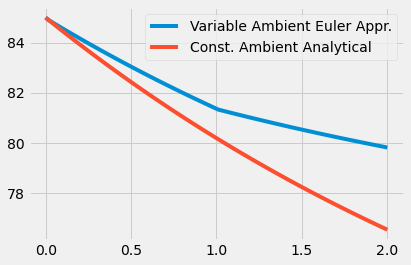

In [9]:
t5 = np.linspace(0,2,100)
dt = t5[1] - t5[0]
T_num = np.zeros(len(t5))
T_num[0] = 85
k = 0.275
for i in range(1,len(t5)):
    T_num[i] = T_num[i-1] - k * (T_num[i-1] - ambient_temp(t5[i-1])) * dt
    
print('(4.b)')
plt.plot(t5,T_num, label = 'Variable Ambient Euler Appr.')
plt.plot(t5,BodyTemp_Analytical(65, 85, 0.275, t5), label = 'Const. Ambient Analytical')
plt.legend();

(4.b) I'm going to show two different methods for determining the time of death, using the variable ambient conditions and the Euler approximation. The first method will use guess and check, by changing the starting value of the time array until the temperature at time 0 is approximately 85F. The second method will reverse the time array and conduct the Euler approximation going backwards. Then we can search the array for temperatures close to 98.6F and determine the corresponding time of death.

(4.b) This approximation method with variable ambient temperature
 predicts the time of death was approximately 105.00 minutes ago


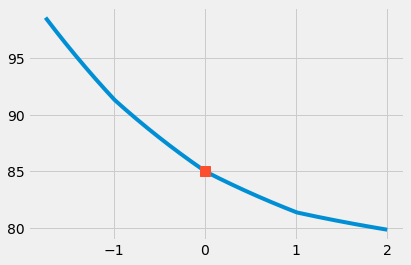

In [10]:
### This method involves guess and check, changing the starting value of the time array 
### until the temperature at time 0 is approximately 85F
t = np.linspace(-1.75,2,376)
dt = t[1] - t[0]
T_num = np.zeros(len(t))
T_num[0] = 98.6
k = 0.275
for i in range(1,len(t)):
    T_num[i] = T_num[i-1] - k * (T_num[i-1] - ambient_temp(t[i-1])) * dt
    
print('(4.b) This approximation method with variable ambient temperature\n predicts'
      ' the time of death was approximately {:0.2f} minutes ago'.format(t[0] * -60))
plt.plot(t,T_num)
plt.plot(0,85, 's', markersize = 10);

(4.b)The Euler approximation with variable ambient temperature predicts the time of death was approximately -1.759 hours ago


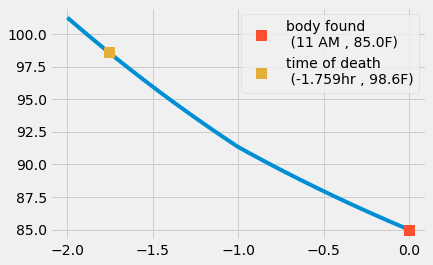

In [11]:
### This method reverses the time array and conducts the Euler approximation going backwards
### Then we can search for the temperature close to 98.6F and determine the time of death at that point

body_found = 11
t = np.linspace(0,-2,4000)
dt = t[1] - t[0]
T_num = np.zeros(len(t))
T_num[0] = 85
k = 0.275
for i in range(1,len(t)):
    T_num[i] = T_num[i-1] - k * (T_num[i-1] - ambient_temp(t[i-1])) * dt
    
for Tem in T_num:
    if Tem > 98.599 and Tem < 98.601:
        TOD = Tem

Time_death = t[np.where(T_num == TOD)]
        
print('(4.b)The Euler approximation with variable ambient temperature predicts'
      ' the time of death was approximately {:0.3f} hours ago'.format(float(Time_death)))

plt.plot(t,T_num)
plt.plot(0,85, 's', markersize = 10, label = 'body found \n ({} AM , {}F)'.format(body_found,T_num[0]))
plt.plot(Time_death,TOD, 's', markersize = 10, label = 'time of death \n ({:0.4}hr , {:0.4}F)'.format(float(Time_death),TOD))
plt.legend();

I think the second method likely gives the more accurate solution, since it directly calculates the time of death based on the conditions inputted, as opposed to the guess and check method.